In [39]:
import argparse
from ddpm.denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer, Galaxies
import torch
import wandb

wandb.init()

%load_ext autoreload
%autoreload 2

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


loss,███████████████████▇▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▇█▆▄▁██▅▃▁▇█▅▃▁▇█▆▃
step,▁▁▂▂▃▃▃▄▄▄▅▅▅▆▆▇▁▁▂▂▃▁▂▂▂▃▃▄▄▄▅▅▅▆▆▆▇▇██
loss,0.00755
lr,2e-05
step,15549


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda')

In [41]:
model = Unet(
    dim = 128,
    dim_mults = (1, 1, 2, 2, 2, 4, 4, 4)
).to(device=DEVICE)

diffusion = GaussianDiffusion(
    model,
    image_size =128,
    timesteps = 1000,
    loss_type = 'l2'
).to(device=DEVICE)

In [42]:
# args = {'dataset': 'desi_bgs'}
# wandb.watch(diffusion, log_freq=100)

In [43]:
trainer = Trainer(
    diffusion,
    '/pscratch/sd/s/sihany/desiimages/',
    logdir = '/pscratch/sd/s/sihany/logs/desi/',
    image_size = 128,
    train_batch_size = 16,
    train_lr = 1e-4,
    train_num_steps = 40000,         # total training steps
    gradient_accumulate_every = 1,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    step_start_ema = 5000,
    save_every = 2000,
    sample_every = 1000,
    num_workers=16,
    # rank = [0, 1, 2]
)

In [44]:
# trainer.load(800)

In [ ]:
trainer.train()

loss = 0.011953344568610191:   8%|▊         | 3272/40000 [07:14<1:07:39,  9.05it/s] 

In [29]:
# sample and plot

all_images = diffusion.sample(256, batch_size = 6)
all_images = (all_images + 1)/2
# all_images = list(map(lambda x: (x - 0)/(255 - 0), all_images))
all_images = torch.flip(all_images, dims=[1])*255 # map channels correctly for imout
all_images = all_images.round()


sampling loop time step: 100%|██████████| 1000/1000 [00:19<00:00, 50.93it/s]


(array([  92.,  814., 7672., 6639.,  933.,  102.,   45.,   24.,   35.,
          28.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

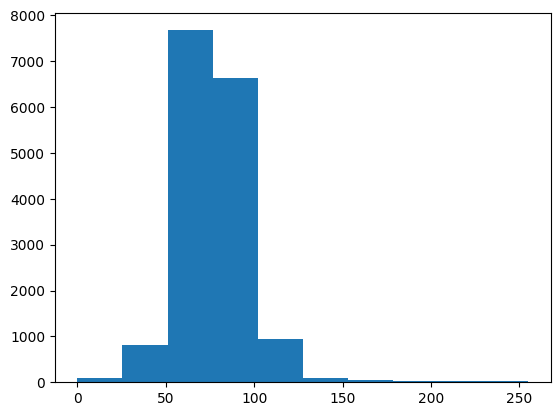

In [8]:
import matplotlib.pyplot as plt
plt.hist(all_images[0].cpu()[0].flatten())

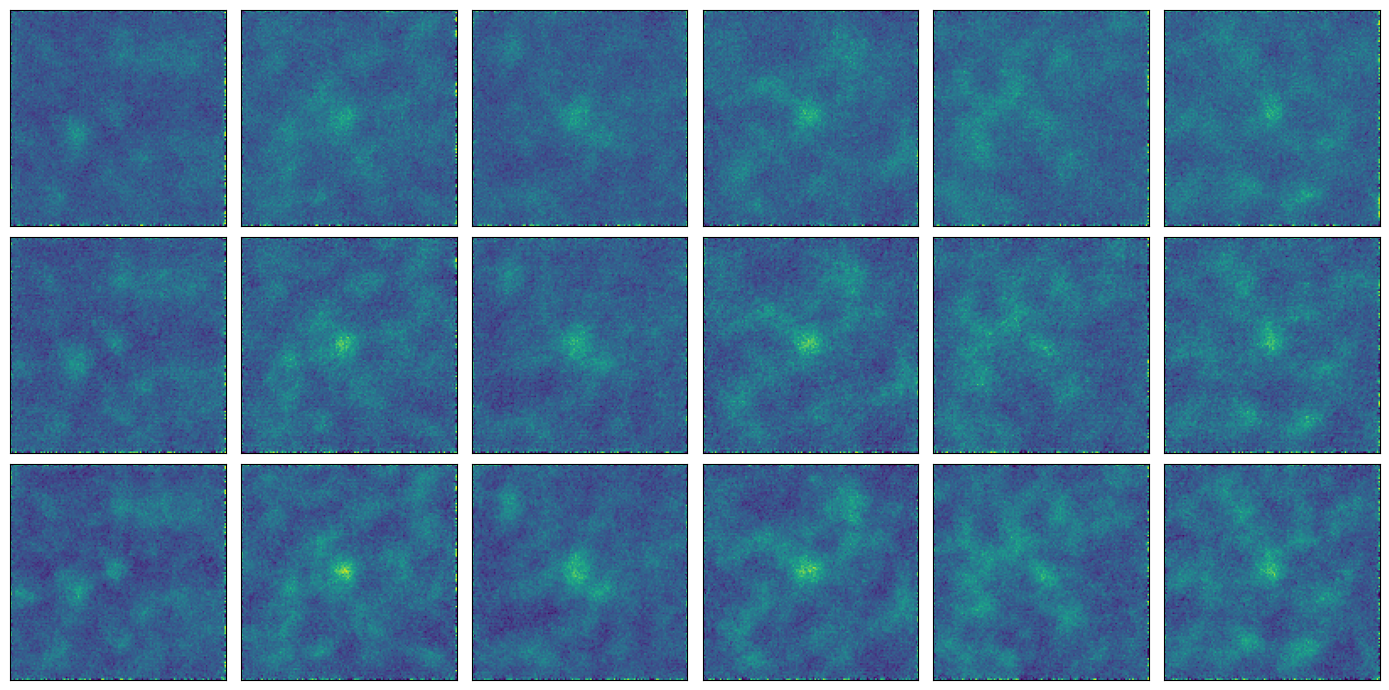

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 7), ncols = 6, nrows = 3)
for i in range(6):
    # a = fits.open(fi)[0].data
    for jj in range(3):
        ax[jj][i].imshow(all_images[i].cpu()[jj,:,:])
        ax[jj][i].set_xticks([])
        ax[jj][i].set_yticks([])
    
plt.tight_layout()

# check images

In [44]:
fns = glob('/pscratch/sd/s/sihany/desiimages/*.npy')
np.load(fns[0]).shape

(3, 128, 128)

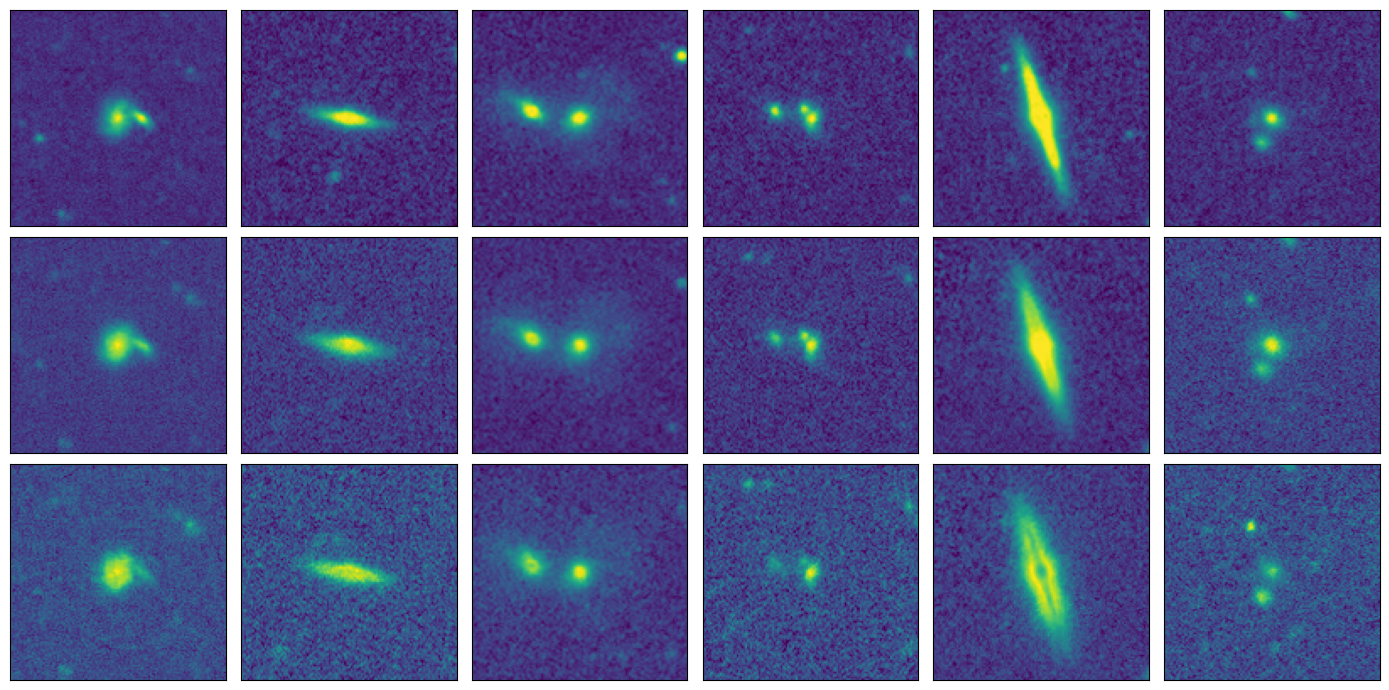

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from astropy.io import fits
from glob import glob
import random

catalog = fits.open('/pscratch/sd/v/virajvm/sandy_imgs/jura_bgs_N_20000.fits')[1].data
ids = catalog['TARGETID']
maskrflux = catalog['FLUX_R'] > 0
ids_sel = ids[maskrflux]

# fns = [f'/pscratch/sd/v/virajvm/sandy_imgs/grz_cutouts_jpg/grz_dr9_id_{eid}.jpg' for eid in ids_sel]

fns = glob('/pscratch/sd/s/sihany/desiimages/*.npy')

rfns = random.sample(fns, 6)

fig, ax = plt.subplots(figsize = (14, 7), ncols = 6, nrows = 3)
for i, fi in enumerate(rfns):
    # a = fits.open(fi)[0].data
    a = np.load(fi)
    # print(a, np.max(a), np.min(a))
    for jj in range(3):
        ax[jj][i].imshow(a[jj, :,:])
        ax[jj][i].set_xticks([])
        ax[jj][i].set_yticks([])
    
plt.tight_layout()


In [26]:
a

NameError: name 'a' is not defined

In [6]:
fns = [f'/pscratch/sd/v/virajvm/sandy_imgs/grz_cutouts_jpg/grz_dr9_id_39628065248123413.fits' for ename in [1,2,3]]

In [11]:
from os.path import basename
basename(fns[0])[11:-5]

'39628065248123413'